In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Churn.csv', sep=';')
dataset.head(991)

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
986,988,566,RS,Masculino,36,1,14212091,1,1,0,7961637.0,0
987,989,569,SC,Masculino,34,0,15183926,1,1,0,10229981.0,1
988,990,659,SC,F,31,7,14962088,2,1,1,10453351.0,0
989,991,722,RS,Feminino,49,3,16819766,1,1,0,14076557.0,1


In [3]:
dataset.shape

(999, 12)

In [4]:
#acertando os nomes das colunas
dataset.columns = ['Id',
                   'Score',
                   'Estado',
                   'Genero',
                   'Idade',
                   'Patrimônio',
                   'Saldo',
                   'Produtos',
                   'TemCartCredito',
                   'Ativo',
                   'Salário',
                   'Saiu']

In [5]:
dataset

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [6]:
#levantando os dados específicos para ver se tem algum tipo de erros a serem tratados
#Explorar dados categóricos
#estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [7]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

In [8]:
#levantando os dados específicos para ver se tem algum tipo de erros a serem tratados.
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [9]:
#levantando os dados específicos para ver se tem algum tipo de erros a serem tratados
#Explorando colunas numéricas
#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

In [10]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [11]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

C:\Users\ghcr2\AppData\Local\Temp\ipykernel_588\3978263718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Saldo']).set_title('Saldo')


Text(0.5, 1.0, 'Saldo')

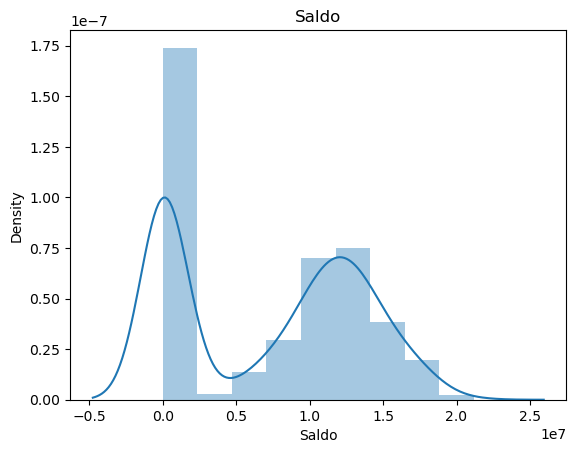

In [12]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

In [13]:
#Tratando os dados identificados anteriormente 


In [14]:
#começando tratando os NAN
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

In [15]:
#tratando os NAN começando com o Salário
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

In [16]:
#usando a Mediana de statistics 
mediana = sts.median(dataset['Salário'])
mediana

70518.0

In [17]:
#substituir NAN por Mediana
dataset['Salário'].fillna(mediana, inplace=True)

In [18]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salário           0
Saiu              0
dtype: int64

In [19]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [20]:
#Preencher as NAN com masculino (MODA), pois é o valor que mais ocorre
#E pq não se trata de valores númericos
#masculino foi o valor que eu queria preencher

dataset['Genero'].fillna('Masculino', inplace=True)

In [21]:
dataset['Genero'].isnull().sum()

0

In [22]:
#Tratando os dados FEM, F, M, FEMININO, MASCULINO
# O ISIN é se contém dentro, então faça, daí vc passa a condição

dataset.loc[dataset['Genero']== 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'

agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [23]:
# Setando as idades
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [24]:
#localizando idades fora do dominio, fora do padrão
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [25]:
mediana02 = sts.median(dataset['Idade'])
mediana02

37

In [26]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)] = mediana02

In [27]:
dataset['Idade'].describe()

count    999.000000
mean      38.903904
std       10.672421
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

In [28]:
dataset[dataset.duplicated(['Id'], keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [29]:
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu


In [30]:
dataset[dataset.duplicated(['Id'], keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu


In [31]:
# Usaremos o ISIN outra vez. 
#isin() nos retorna um DataFrame de booleanos,
#ou seja de Trues e Falses, que nos diz se os valores passados para dentro do método estão no seu DataFrame ou não,

dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'
agrupado03 = dataset.groupby(['Estado']).size()
agrupado03

Estado
PR    257
RS    480
SC    258
dtype: int64

In [32]:
# Tratando OUTLIERS, que são os salários acima da média
# Para tratar OUTLIER é usado STD, o desvio padrão
# Primeiro vamos levantar o desvio padrão dos dados

dp = sts.stdev(dataset['Salário'])
dp


529784177.60963464

In [33]:
# Por padrão é checado se o valor fora do normal, os valores OUTLIERS
# está fora 2X maior de DESVIO PADRÃO, checando abaixo

dataset.loc[dataset['Salário'] >= 2* dp]

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [34]:
# Achando, usaremos a MEDIANA para atualizarmos os valores
mediana03 = sts.median(dataset['Salário'])
mediana03

8641028.0

In [35]:
# Atribuindo , o 'SALÄRIO' após a condição refere-se a coluna

dataset.loc[dataset['Salário'] >= 2 * dp, 'Salário'] = mediana03

# Checando a atualização

dataset.loc[dataset['Salário'] >= 2* dp]

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu


In [36]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [37]:
dataset.shape

(995, 12)

In [38]:
dataset

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [39]:
# Criando uma lista dos elementos onde queremos trabalhar
# Teste para saber quem possui maior score, homem ou mulher.. assim para sabermos quem lida melhor coma as contas

lista = list(set(dataset.Genero))
lista

['Masculino', 'Feminino']

In [40]:
# Criando os Eixos
x= dataset.Idade
y= dataset.Score

In [42]:
dataset.to_excel('Tabela_Tratada.xlsx')